In [ ]:
import pandas as pd

data = pd.read_csv('/content/train.csv')

In [ ]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    1
pixel780    1
pixel781    1
pixel782    1
pixel783    1
Length: 785, dtype: int64

In [ ]:
data.shape

(11469, 785)

In [ ]:
# Pour supprimer les lignes contenant des valeurs nulles
data_cleaned = data.dropna()

# Affichez le nombre de valeurs nulles par colonne pour vérifier
print(data_cleaned.isnull().sum())

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


In [ ]:
data_cleaned['label'].value_counts()

label
1    1288
2    1196
7    1179
6    1160
3    1155
9    1125
0    1114
4    1104
8    1088
5    1059
Name: count, dtype: int64

In [ ]:
X = data_cleaned.drop(columns='label', axis=1)
Y = data_cleaned['label']

In [ ]:
print(X,Y)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
11463       0       0       0       0       0       0       0       0       0   
11464       0       0       0       0       0       0       0       0       0   
11465       0       0       0       0       0       0       0       0       0   
11466       0       0       0       0       0       0       0       0       0   
11467       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

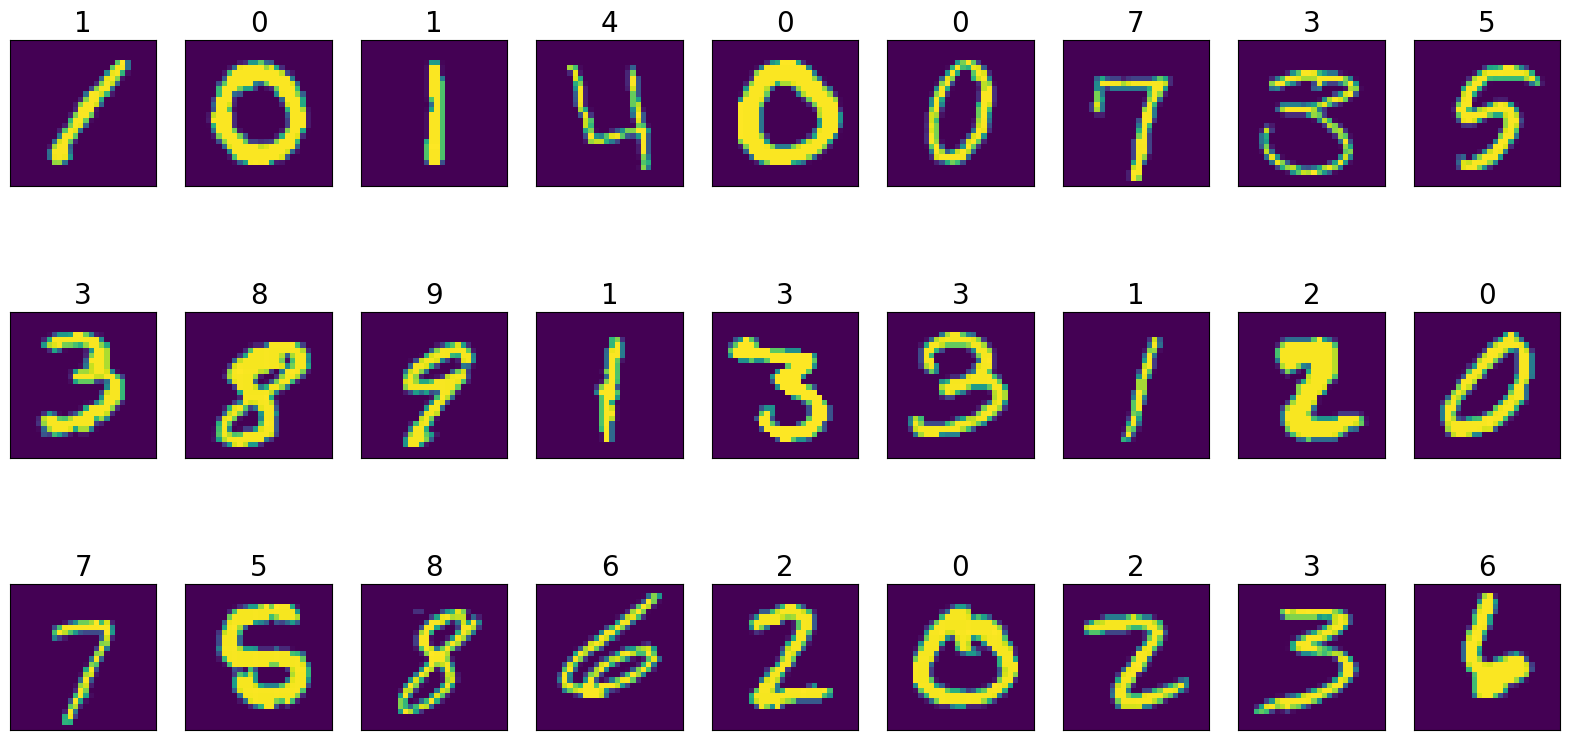

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for i in range(27):
    plt.subplot(3, 9, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X.iloc[i].to_numpy().reshape((28,28,1)))
    plt.title(Y[i],size = 20)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)

In [ ]:
#pour standariser ou Normalisation des données :
#Les valeurs des pixels sont divisées par 255 pour normaliser les données entre 0 et 1. Cela aide à stabiliser et à accélérer l'entraînement du modèle.
train_x = X_train/255.0
test = X_test/255.0
print("X_train Shape  : ",train_x.shape)
print("Test Shape     : ",test.shape)

X_train Shape  :  (9174, 784)
Test Shape     :  (2294, 784)


In [ ]:
train_x = train_x.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("X_train Shape  : ",train_x.shape)
print("Test Shape     : ",test.shape)

X_train Shape  :  (9174, 28, 28, 1)
Test Shape     :  (2294, 28, 28, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, MaxPool2D, Flatten, Conv2D, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [ ]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),metrics =['accuracy'])


In [ ]:
history = model.fit(
    train_x,
    Y_train,
    batch_size=1000,
    epochs=30,
    verbose=1,
    validation_data=(test,Y_test),
)

Epoch 1/30
10/10 [==============================] - 5s 369ms/step - loss: 2.0847 - accuracy: 0.3094 - val_loss: 1.5586 - val_accuracy: 0.7105
Epoch 2/30
10/10 [==============================] - 3s 316ms/step - loss: 1.2850 - accuracy: 0.6116 - val_loss: 0.7622 - val_accuracy: 0.7864
Epoch 3/30
10/10 [==============================] - 5s 504ms/step - loss: 0.8449 - accuracy: 0.7205 - val_loss: 0.5632 - val_accuracy: 0.8405
Epoch 4/30
10/10 [==============================] - 7s 681ms/step - loss: 0.6644 - accuracy: 0.7828 - val_loss: 0.4569 - val_accuracy: 0.8649
Epoch 5/30
10/10 [==============================] - 3s 319ms/step - loss: 0.5700 - accuracy: 0.8177 - val_loss: 0.3896 - val_accuracy: 0.8840
Epoch 6/30
10/10 [==============================] - 3s 309ms/step - loss: 0.5090 - accuracy: 0.8324 - val_loss: 0.3491 - val_accuracy: 0.8932
Epoch 7/30
10/10 [==============================] - 4s 397ms/step - loss: 0.4391 - accuracy: 0.8564 - val_loss: 0.3221 - val_accuracy: 0.8997
Epoch 

In [ ]:
loss, accuracy = model.evaluate(test, Y_test)
print(accuracy)

72/72 [==============================] - 1s 11ms/step - loss: 0.0988 - accuracy: 0.9695
0.9694856405258179


In [ ]:
Y_pred = model.predict(test)

72/72 [==============================] - 1s 6ms/step


In [ ]:
print(Y_pred)

[[6.3681935e-09 1.0750767e-07 1.9165927e-06 ... 4.0466279e-05
  8.4386393e-06 1.3464886e-05]
 [9.9998230e-01 1.4057838e-07 6.1668102e-06 ... 6.7483415e-07
  2.6674545e-07 5.7875882e-06]
 [9.9988955e-01 1.1904258e-07 1.1206462e-05 ... 2.6239482e-07
  2.8695531e-06 3.6888825e-06]
 ...
 [4.3809940e-03 8.2772742e-05 8.1760448e-01 ... 3.6903843e-04
  1.1349830e-03 1.2549885e-04]
 [1.0763557e-07 1.6810852e-06 2.2750646e-05 ... 5.5342494e-05
  9.9073559e-06 7.0645169e-06]
 [2.0225356e-07 2.3111227e-06 2.2848183e-04 ... 2.0477032e-06
  2.8055609e-05 2.8701376e-07]]


In [ ]:
print(Y_pred.shape)
print(Y_pred[0])

(2294, 10)
[6.3681935e-09 1.0750767e-07 1.9165927e-06 9.9993342e-01 7.7458164e-09
 2.1261960e-06 5.0723026e-11 4.0466279e-05 8.4386393e-06 1.3464886e-05]


In [ ]:
print(Y_pred)

[[6.3681935e-09 1.0750767e-07 1.9165927e-06 ... 4.0466279e-05
  8.4386393e-06 1.3464886e-05]
 [9.9998230e-01 1.4057838e-07 6.1668102e-06 ... 6.7483415e-07
  2.6674545e-07 5.7875882e-06]
 [9.9988955e-01 1.1904258e-07 1.1206462e-05 ... 2.6239482e-07
  2.8695531e-06 3.6888825e-06]
 ...
 [4.3809940e-03 8.2772742e-05 8.1760448e-01 ... 3.6903843e-04
  1.1349830e-03 1.2549885e-04]
 [1.0763557e-07 1.6810852e-06 2.2750646e-05 ... 5.5342494e-05
  9.9073559e-06 7.0645169e-06]
 [2.0225356e-07 2.3111227e-06 2.2848183e-04 ... 2.0477032e-06
  2.8055609e-05 2.8701376e-07]]


In [ ]:
import numpy as np
# Converting the prediction probability to class labels
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[3, 0, 0, 5, 1, 6, 6, 6, 4, 2, 0, 4, 8, 5, 3, 0, 2, 9, 7, 0, 3, 9, 7, 6, 2, 7, 0, 0, 2, 1, 4, 8, 9, 1, 0, 2, 0, 1, 6, 1, 1, 8, 2, 1, 1, 2, 6, 7, 3, 4, 7, 0, 9, 5, 5, 0, 0, 8, 4, 8, 4, 4, 4, 7, 6, 5, 5, 9, 9, 9, 5, 4, 7, 7, 1, 6, 9, 4, 2, 5, 9, 9, 4, 5, 6, 8, 5, 7, 8, 3, 1, 6, 6, 2, 1, 7, 9, 9, 8, 7, 9, 7, 0, 7, 3, 7, 5, 1, 1, 7, 0, 4, 0, 0, 1, 3, 1, 7, 5, 9, 1, 6, 5, 8, 1, 1, 0, 0, 8, 6, 8, 2, 7, 2, 7, 8, 7, 5, 5, 5, 4, 8, 6, 6, 6, 0, 0, 3, 9, 7, 3, 4, 2, 9, 7, 9, 9, 5, 5, 7, 9, 8, 0, 1, 9, 9, 3, 4, 6, 3, 2, 1, 1, 8, 3, 0, 5, 8, 2, 1, 2, 9, 8, 5, 8, 4, 0, 6, 7, 7, 1, 3, 7, 2, 8, 0, 3, 8, 1, 1, 8, 0, 4, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 9, 6, 8, 3, 5, 1, 8, 1, 9, 1, 4, 4, 8, 7, 3, 4, 6, 6, 7, 7, 5, 8, 7, 4, 8, 6, 3, 1, 8, 0, 9, 7, 7, 2, 7, 7, 4, 8, 6, 4, 1, 6, 0, 1, 1, 1, 3, 0, 4, 9, 5, 9, 1, 0, 7, 2, 9, 2, 2, 8, 4, 1, 7, 3, 9, 6, 9, 8, 9, 9, 6, 9, 6, 5, 6, 7, 1, 3, 1, 6, 3, 3, 0, 7, 4, 4, 4, 7, 9, 6, 5, 1, 1, 2, 7, 8, 2, 4, 1, 4, 8, 5, 1, 1, 8, 3, 7, 3, 9, 0, 2, 2, 7, 2, 2, 8, 8, 0, 7, 

In [ ]:
input_data = (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,130,190,254,254,250,175,135,96,96,16,4,0,0,0,0,0,0,0,0,0,0,0,0,0,26,102,186,254,254,248,222,222,225,254,254,254,254,254,206,112,4,0,0,0,0,0,0,0,0,0,0,0,207,254,254,177,117,39,0,0,56,248,102,48,48,103,192,254,135,0,0,0,0,0,0,0,0,0,0,0,91,111,36,0,0,0,0,0,72,92,0,0,0,0,12,224,210,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,139,240,254,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,121,220,254,244,194,15,0,0,0,0,0,0,0,0,0,0,0,0,0,8,107,112,112,112,87,112,141,218,248,177,68,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,221,254,254,254,254,254,225,104,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,32,32,32,32,130,215,195,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,111,231,174,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,18,0,0,0,0,0,0,0,0,0,40,228,205,35,0,0,0,0,0,0,0,0,0,0,0,0,22,234,42,0,0,0,0,0,0,0,0,0,0,56,212,226,38,0,0,0,0,0,0,0,0,0,0,0,96,157,0,0,0,0,0,0,0,0,0,0,0,0,30,215,188,9,0,0,0,0,0,0,0,0,0,0,96,142,0,0,0,0,0,0,0,0,0,0,0,0,0,86,254,68,0,0,0,0,0,0,0,0,0,0,71,202,15,0,0,0,0,0,0,0,0,0,0,0,0,6,214,151,0,0,0,0,0,0,0,0,0,0,10,231,86,2,0,0,0,0,0,0,0,0,0,0,0,0,191,207,0,0,0,0,0,0,0,0,0,0,0,93,248,129,7,0,0,0,0,0,0,0,0,0,0,117,238,112,0,0,0,0,0,0,0,0,0,0,0,0,94,248,209,73,12,0,0,0,0,0,0,42,147,252,136,9,0,0,0,0,0,0,0,0,0,0,0,0,0,48,160,215,230,158,74,64,94,153,223,250,214,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,129,189,234,224,255,194,134,75,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
print('**',input_data_as_numpy_array )




** [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  21 130 190
 254 254 250 175 135  96  96  16   4   0   0   0   0   0   0   0   0   0
   0   0   0   0  26 102 186 254 254 248 222 222 225 254 254 254 254 254
 206 112   4   0   0   0   0   0   0   0   0   0   0   0 207 254 254 177
 117  39   0   0  56 248 102  48  48 103 192 254

In [ ]:
this = input_data_as_numpy_array/255.0


In [ ]:


# Calculate required size
required_size = 28 * 28  # 784

# Pad the data to the required size
if this.size < required_size:
    padded_data = np.pad(this, (0, required_size - this.size), 'constant')
else:
    padded_data = this[:required_size]  # Crop if needed

# Reshape to (1, 28, 28, 1)
reshaped_data = padded_data.reshape((1, 28, 28, 1))

print(reshaped_data.shape)


(1, 28, 28, 1)


In [ ]:
prediction = model.predict(reshaped_data)


1/1 [==============================] - 0s 20ms/step


In [ ]:
print(prediction)


[[5.5406812e-08 6.7387595e-07 2.7171904e-05 9.9952090e-01 5.6118981e-08
  1.2672947e-04 1.0041521e-09 5.7115540e-06 3.0471873e-04 1.3970112e-05]]


In [ ]:
prediction_label = [np.argmax(prediction)]
print("prediction_label : ", prediction_label)

prediction_label :  [3]
